###PRIMERA PARTE: ANALIZANDO LA BASE###

EJERCICIO 2:LIMPIEZA DE BASE DE DATOS

In [246]:
import pandas as pd
import numpy as np

#Abrimos la base

df = pd.read_excel('./EPH_usu_1er_Trim_2022_xlsx/usu_individual_T122.xlsx')

INCISO a_: eliminamos todos los aglomerados que no correspondan a CABA (cód 32) o GBA (cód 33)

In [247]:
df_cortado = df.query("AGLOMERADO in (32, 33)") # la manera mas rapida y facil de hacerlo

print(len(df_cortado))

df_cortado.sample(10)

6706


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
44379,TQRMNOPURHMMPTCDEIJAH00780878,2022,1,1,1,1,1,S,33,2804,...,NaN,5,87000.00,9,NaN,9,9.0,NaN,10,2923
44660,TQRMNORQXHKMNMCDEIJAH00780880,2022,1,1,1,1,1,S,33,1543,...,NaN,5,30000.00,5,NaN,4,4.0,NaN,5,1349
8158,TQRMNORRWHLMMLCDEIJAH00719575,2022,1,1,5,1,1,S,33,1711,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0
17437,TQRMNOPSVHMMOQCDEIJAH00700418,2022,1,1,3,1,1,S,33,1800,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0
25430,TQRMNOTSVHKMLPCDEIJAH00780618,2022,1,1,1,1,1,S,33,3850,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0
5490,TQRMNOQWVHKNKMCDEIIAD00779813,2022,1,1,1,1,1,S,32,2044,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0
42666,TQRMNOSTYHLMOOCDEIJAH00780886,2022,1,1,2,1,1,S,33,2693,...,NaN,6,52500.00,7,NaN,7,7.0,NaN,8,3676
24886,TQRMNOUPYHLLMLCDEIIAD00779988,2022,1,1,1,1,1,S,32,1606,...,NaN,0,0.00,0,NaN,0,0.0,NaN,0,1939
5028,TQRMNOUSQHKMLPCDEIJAH00780305,2022,1,1,5,0,1,S,33,4845,...,NaN,5,15666.67,2,NaN,2,2.0,NaN,2,6785
40128,TQRMNOPVRHLKMSCDEIIAD00718402,2022,1,1,1,1,1,S,32,1941,...,NaN,4,14000.00,2,NaN,2,2.0,NaN,1,4504


INCISO b_ : eliminamos obs que no tienen sentido

In [248]:
#Las variables PP08 son ingresos por la actividad principal por lo que si el indiv no es ocupado estas variables son missing, entonces si nos quedamos con las obs mayores o iguales a 0 estaríamos eliminando a todos los no ocupados.
#Eliminamos obs con valores de ingreso y edad negativos
df_cortado = df_cortado.query("CH06 >= 0")
df_cortado = df_cortado.drop(df_cortado[df_cortado['PP08D1']<0].index)
df_cortado = df_cortado.drop(df_cortado[df_cortado['PP08D4']<0].index)
df_cortado = df_cortado.drop(df_cortado[df_cortado['PP08F1']<0].index)
df_cortado = df_cortado.drop(df_cortado[df_cortado['PP08F2']<0].index)
df_cortado = df_cortado.drop(df_cortado[df_cortado['PP08J1']<0].index)
df_cortado = df_cortado.drop(df_cortado[df_cortado['PP08J2']<0].index)
df_cortado = df_cortado.drop(df_cortado[df_cortado['PP08J3']<0].index)
df_cortado = df_cortado.drop(df_cortado[df_cortado['IPCF']<0].index)
df_cortado = df_cortado.drop(df_cortado[df_cortado['ITF']<0].index)

print(len(df_cortado))

5992


INCISO c_ : gráfico de barras composición por sexo

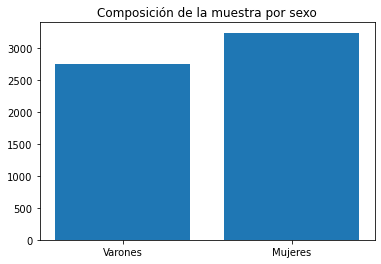

In [249]:
import matplotlib.pyplot as plt

varones = df_cortado.query("CH04 == 1")
mujeres = df_cortado.query("CH04 == 2")

plt.bar(['Varones', 'Mujeres'], [len(varones), len(mujeres)])
plt.title("Composición de la muestra por sexo")
plt.show()

INCISO d_ : correlaciones 

<AxesSubplot:>

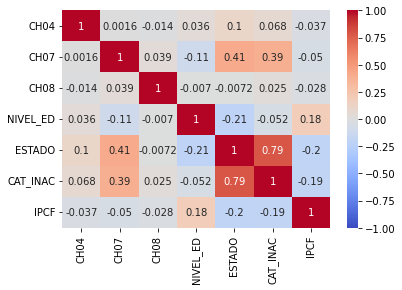

In [250]:
import seaborn as sns

df_corr=df_cortado[["CH04", "CH07","CH08", "NIVEL_ED", "ESTADO", "CAT_INAC", "IPCF"]]
sns.heatmap(df_corr.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')


INCISO e_ : cantidad de Desocupados

In [251]:
from tabulate import tabulate

des=0
inac=0
ocup=0
for elem in df_cortado["ESTADO"]: #ESTADO=0(NO RESPONDE), ESTADO=1 (OCUPADO), ESTADO=2(DESOCUPADO), ESTADO=3(INACTIVO), ESTADO=4(MENOR DE 10)
    if elem==2:
        des=des+1
    elif elem==3:
        inac=inac+1
    elif elem==1:
        ocup=ocup+1


df_inc=df_cortado[["ESTADO", "IPCF"]]
mean=df_inc.groupby(by="ESTADO").mean()
mean=mean.drop(0) #Eliminamos ESTADO=0 que son los que no respondieron

table=pd.DataFrame(columns=["Desocupados","Inactivos","Ocupados", "Mean_IPCF_ocup","Mean_IPCF_desocup","Mean_IPCF_inac"])
table.loc[0]=[des,inac,ocup,round(mean.loc[1, "IPCF"]),round(mean.loc[2, "IPCF"]),round(mean.loc[3, "IPCF"])]

#Imprimos una tabla con datos solicitados.
print(tabulate(table,headers="keys"))

#Exportamos tabla
with open('mean_table.tex','w') as tf:
    tf.write(table.to_latex())



      Desocupados    Inactivos    Ocupados    Mean_IPCF_ocup    Mean_IPCF_desocup    Mean_IPCF_inac
--  -------------  -----------  ----------  ----------------  -------------------  ----------------
 0            232         2695        2324             39839                14758             22350


INCISO f_ : agregamos las variables adulto_equiv y ad_equiv_hogar:

Abrimos  y limpiamos la base de equivalencias

In [252]:
df_equiv = pd.read_excel('tabla_adulto_equiv.xlsx')

df_equiv.loc[1,"Edad"]=1


for i in range(0,18):
    df_equiv.loc[i,"Edad"]= i 

for i in range(18,30): #18-29 años 0.76/1.02
    df_equiv.loc[i]= [i,0.76,1.02] 

for i in range(30,46): #30-45 años 0.77/1
    df_equiv.loc[i]= [i,0.77,1] 

for i in range(46,61): #46-60 años 0.76/1
    df_equiv.loc[i]= [i,0.76,1] 

for i in range(61,76): #61-75 años 0.67/0.83
    df_equiv.loc[i]= [i,0.67,0.83]

for i in range(76,106): #18-29 años 0.63/0.74. La edad max en la EPH es 105 años. 
    df_equiv.loc[i]= [i,0.63,0.74] 

df_equiv = df_equiv.rename(columns={'Edad':'CH06'})
print(df_equiv)

      CH06  Mujeres  Varones
0        0     0.35     0.35
1        1     0.37     0.37
2        2     0.46     0.46
3        3     0.51     0.51
4        4     0.55     0.55
..     ...      ...      ...
101  101.0     0.63     0.74
102  102.0     0.63     0.74
103  103.0     0.63     0.74
104  104.0     0.63     0.74
105  105.0     0.63     0.74

[106 rows x 3 columns]


Añadimos la variable 'adulto_equiv' a la base de la EPH

In [253]:
df_merge=df_cortado.merge(df_equiv, on='CH06')

for i in range(len(df_merge)):
    if df_merge.loc[i,"CH04"]==1:
        df_merge.loc[i,"adulto_equiv"]=df_merge.loc[i,"Varones"]
    elif df_merge.loc[i,"CH04"]==2:
        df_merge.loc[i,"adulto_equiv"]=df_merge.loc[i,"Mujeres"]


df_merge.drop (["Varones","Mujeres"] , axis =1 , inplace = True)

#El data frame relevante ahora es df_merge


Creamos la variable 'ad_equiv_hogar' agrupando por CODUSO Y NRO_HOGAR

In [254]:
df_sum=df_merge.groupby(['CODUSU', 'NRO_HOGAR'])[['adulto_equiv']].agg('sum')
df_sum.reset_index( inplace = True )
df_sum = df_sum.rename(columns={'adulto_equiv':'ad_equiv_hogar'})

df_merge_1=df_merge.merge(df_sum, on=["CODUSU", "NRO_HOGAR"])
df_merge_1.sort_values(by="CODUSU")

#El data frame relevante ahora es df_merge_1


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,adulto_equiv,ad_equiv_hogar
4273,TQRMNOPPQHJMNRCDEIJAH00693035,2022,1,1,1,1,1,S,33,1427,...,26000.00,4,NaN,4,4.0,NaN,4,2359,1.02,2.88
4275,TQRMNOPPQHJMNRCDEIJAH00693035,2022,1,1,3,0,1,S,33,1427,...,26000.00,4,NaN,4,4.0,NaN,4,2359,0.64,2.88
4276,TQRMNOPPQHJMNRCDEIJAH00693035,2022,1,1,4,0,1,S,33,1427,...,26000.00,4,NaN,4,4.0,NaN,4,2359,0.46,2.88
4274,TQRMNOPPQHJMNRCDEIJAH00693035,2022,1,1,2,1,1,S,33,1427,...,26000.00,4,NaN,4,4.0,NaN,4,2359,0.76,2.88
5368,TQRMNOPPQHJMQLCDEIJAH00702455,2022,1,1,1,1,1,S,33,2054,...,55000.00,8,NaN,7,8.0,NaN,8,3275,0.67,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,TQUMNORTQHLMNUCDEIJAH00780261,2022,1,1,6,0,1,S,33,2031,...,32257.14,5,NaN,5,5.0,NaN,5,4308,0.60,5.64
4236,TQUMNORTQHLMNUCDEIJAH00780261,2022,1,1,2,1,1,S,33,2031,...,32257.14,5,NaN,5,5.0,NaN,5,4308,1.02,5.64
4237,TQUMNORTQHLMNUCDEIJAH00780261,2022,1,1,1,1,1,S,33,2031,...,32257.14,5,NaN,5,5.0,NaN,5,4308,0.77,5.64
4238,TQUMNORTQHLMNUCDEIJAH00780261,2022,1,1,5,1,1,S,33,2031,...,32257.14,5,NaN,5,5.0,NaN,5,4308,0.82,5.64


EJERCICIO 3: Cuantos no respondieron ingreso

In [255]:
#Contamos cuando no respondieron
no_resp=0
for elem in df_merge_1["ITF"]:
    if elem==0:
        no_resp=no_resp+1
print("No respondieron ingreso", no_resp, "personas", "de", len(df_merge_1))

#Guardamos las obs que respondieron en el df 'df_respondieron':
df_respondieron = df_merge_1.drop(df_merge_1[df_merge_1['ITF']<=0].index)
df_respondieron.reset_index(inplace=True, drop=True)

##Guardamos las obs que no respondieron en el df 'df_norespondieron':
df_norespondieron= df_merge_1.drop(df_merge_1[df_merge_1['ITF']>0].index) 
df_norespondieron.reset_index( inplace = True )
print(len(df_norespondieron)) #chequeamos que la cantidad de obs sea igual a no_resp



No respondieron ingreso 2250 personas de 5992
2250


EJERCICO 4: agregamos la variable 'ingreso_necesario' que establece la LP para cada individuo

In [256]:
df_respondieron["ingreso_necesario"]=df_respondieron["ad_equiv_hogar"]*(27197.64) #$27197.64 es la CBA

EJERCICIO 5: agregamos la variable 'Pobre' 

In [257]:
df_respondieron["Pobre"]=0

for i in range(len(df_respondieron)):
    if df_respondieron.loc[i,"ingreso_necesario"] < 27197.64 :
        df_respondieron.loc[i,"Pobre"]= 1

pobres=0
for elem in df_respondieron["Pobre"]:
    if elem==1:
        pobres=pobres+1

tasa_pobreza=pobres/len(df_respondieron)

print("La cantidad de pobres en la muestra que respondio es de:", pobres, "de", len(df_respondieron))
print("La tasa pobreza en la muestra es de los que respondieron es de:", round(tasa_pobreza*100,2), "%")





La cantidad de pobres en la muestra que respondio es de: 278 de 3742
La tasa pobreza en la muestra es de los que respondieron es de: 7.43 %


PARTE II: Clasificación

EJERCICIO 1: Eliminamos la variables de ingreso de las dos bases de datos

In [258]:
#Recordemos que tenemos 2 data base relevantes: df_respondieron y df_norespondieron
#Pasamos a float la variable MAS_500 que es de tipo String:
for i in range(len(df_respondieron)):
    if df_respondieron.loc[i,"MAS_500"] == "S" :
        df_respondieron.loc[i,"MAS_500"]= 1
    elif df_respondieron.loc[i,"MAS_500"] == "N":
        df_respondieron.loc[i,"MAS_500"]=0 

for i in range(len(df_norespondieron)):
    if df_norespondieron.loc[i,"MAS_500"] == "S" :
        df_norespondieron.loc[i,"MAS_500"]= 1
    elif df_norespondieron.loc[i,"MAS_500"] == "N":
        df_norespondieron.loc[i,"MAS_500"]=0 
        


In [259]:
#Eliminamos las variables de "Ingreso total familiar"
df_respondieron.drop (["ITF","DECIFR","IDECIFR","RDECIFR","GDECIFR", "PDECIFR","ADECIFR"] ,axis =1, inplace = True)
df_norespondieron.drop (["ITF","DECIFR","IDECIFR","RDECIFR","GDECIFR", "PDECIFR","ADECIFR"] ,axis =1,  inplace = True)



In [260]:

#Eliminamos las variables de "Ingreso per capita familiar"
df_respondieron.drop ([ "IPCF", "DECCFR", "IDECCFR", "RDECCFR", "GDECCFR", "PDECCFR", "ADECCFR", "PONDIH"] , axis =1 , inplace = True)
df_norespondieron.drop ([ "IPCF", "DECCFR", "IDECCFR", "RDECCFR", "GDECCFR", "PDECCFR", "ADECCFR", "PONDIH"] , axis =1 , inplace = True)


In [261]:

#Eliminamos las variables de "Ingresos de la ocupación principal de los trabajadores independientes"
df_respondieron.drop ([ "PP06A", "PP06C", "PP06D", "PP06E", "PP06H"] , axis =1 , inplace = True)
df_norespondieron.drop ([ "PP06A", "PP06C", "PP06D", "PP06E", "PP06H"] , axis =1 , inplace = True)


In [262]:

#Eliminamos las variables de "Ingresos de la ocupación principal de los asalariados"
df_respondieron.drop ([ "PP08D1", "PP08D4", "PP08F1", "PP08F2", "PP08J1", "PP08J2", "PP08J3"] , axis =1 , inplace = True)
df_norespondieron.drop ([ "PP08D1", "PP08D4", "PP08F1", "PP08F2", "PP08J1", "PP08J2", "PP08J3"] , axis =1 , inplace = True)


In [263]:

#Eliminamos las variables de "Ingresos de la ocupación principal"
df_respondieron.drop ([ "P21", "DECOCUR", "IDECOCUR", "RDECOCUR", "GDECOCUR", "PDECOCUR", "ADECOCUR", "PONDIIO"] , axis =1 , inplace = True)
df_norespondieron.drop ([ "P21", "DECOCUR", "IDECOCUR", "RDECOCUR", "GDECOCUR", "PDECOCUR", "ADECOCUR", "PONDIIO"] , axis =1 , inplace = True)



In [264]:

#Eliminamos las variables de "Ingreso de otras ocupaciones"
df_respondieron.drop ([ "TOT_P12"] , axis =1 , inplace = True)
df_norespondieron.drop ([ "TOT_P12"] , axis =1 , inplace = True)


In [265]:

#Eliminamos las variables de "Ingreso total individual"
df_respondieron.drop (["P47T", "DECINDR", "IDECINDR", "RDECINDR", "GDECINDR", "PDECINDR", "ADECINDR", "PONDII"] , axis =1 , inplace = True)
df_norespondieron.drop (["P47T", "DECINDR", "IDECINDR", "RDECINDR", "GDECINDR", "PDECINDR", "ADECINDR", "PONDII"] , axis =1 , inplace = True)


In [266]:

#Eliminamos las variables de "Ingresos no laborales"
df_respondieron.drop ([ "V2_M", "V3_M", "V4_M", "V5_M", "V8_M", "V9_M", "V10_M", "V11_M", "V12_M", "V18_M", "V19_AM", "V21_M", "T_VI"] , axis =1 , inplace = True)
df_norespondieron.drop ([ "V2_M", "V3_M", "V4_M", "V5_M", "V8_M", "V9_M", "V10_M", "V11_M", "V12_M", "V18_M", "V19_AM", "V21_M", "T_VI"] , axis =1 , inplace = True)


In [267]:

#Eliminamos las variables adulto_equiv, ad_equiv_hogar e ingreso_necesario:
df_respondieron.drop (["adulto_equiv", "ad_equiv_hogar",  "ingreso_necesario"] , axis =1 , inplace = True)
df_norespondieron.drop (["adulto_equiv", "ad_equiv_hogar"] , axis =1 , inplace = True)



EJERCICIO 2: Dividimos la base en Test y Train

In [268]:
#Importamos bibliotecas necesarias 
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import plot_roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from scipy.special import expit


In [269]:

X_train, X_test, y_train, y_test = train_test_split(df_respondieron.loc[:, df_respondieron.columns!="Pobre" ], df_respondieron["Pobre"],test_size=0.3, random_state=101)

print("La base X Test corresponde al",round(len(X_test)/len(df_respondieron)*100), "% de los datos") #Vemos que test es el 30% de la muestra 
print("La base X Train corresponde al", round(len(X_train)/len(df_respondieron)*100),  "% de los datos") #Vemos que test es el 70% de la muestra 
print("La base y Test corresponde al",round(len(y_test)/len(df_respondieron)*100), "% de los datos") #Vemos que test es el 30% de la muestra 
print("La base y Train corresponde al", round(len(y_train)/len(df_respondieron)*100),  "% de los datos") #Vemos que test es el 70% de la muestra 

#Agregamos una columna de 1 a la base X_train:
X_train["intercept"]=1
X_test["intercept"]=1


La base X Test corresponde al 30 % de los datos
La base X Train corresponde al 70 % de los datos
La base y Test corresponde al 30 % de los datos
La base y Train corresponde al 70 % de los datos


In [270]:

#Eliminamos la varible CODUSU y CH05 (fecha de nacimiento) de las bases ya que son variables que no están en formato numérico y no son relevantes:
X_test.drop (["CODUSU", "CH05", "PP09A_ESP"] , axis =1 , inplace = True)
X_train.drop (["CODUSU", "CH05", "PP09A_ESP"] , axis =1 , inplace = True)

#Pasamos los valores Nan a 0 ya que esto no afecta la estimación ???!!!
X_train = X_train.replace(np.nan,0)
X_test = X_test.replace(np.nan,0)

#Pasamos el vector y_test a tipo np array
y_test=y_test.to_numpy()


EJERCICIO 3

LOGIT

In [271]:
# Estimamo el modelo logit con las bases Train:
log_reg = LogisticRegression().fit(X_train, y_train)

#Creamos el vector de predicciones (basado en la regla de bayes)
y_pred_log = log_reg.predict(X_test)

c:\Users\Valentin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Metricas de la predicción:

Matriz de confusión:

In [279]:
y_test=y_test.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

Confusion Matrix :
[[1030    2]
 [  90    1]]


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

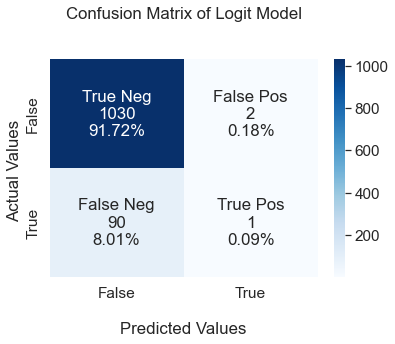

In [294]:
matriz_confusion_log = confusion_matrix(y_test, y_pred_log)

print('Confusion Matrix :')
print(matriz_confusion_log)

#Plot de la Matriz
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                matriz_confusion_log.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     matriz_confusion_log.flatten()/np.sum(matriz_confusion_log)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(matriz_confusion_log, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix of Logit Model\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
#La matriz de confusión tiene en las filas los valores ciertos y en las columnas los valores predichos

Accuracy Score:

In [288]:
ac_log= accuracy_score(y_test, y_pred_log)
print('Accuracy Score :','%.2f' % ac_log) #suma de los % de la diagonal de la matriz 

Accuracy Score : 0.92


AUC y ROC

AUC Logit: 0.50


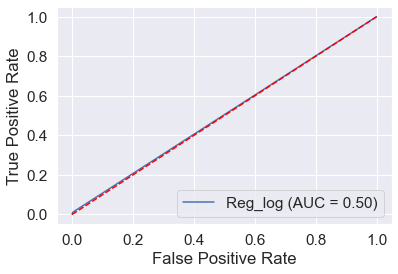

In [295]:
auc_log = roc_auc_score(y_test, y_pred_log)
print('AUC Logit: %.2f' % auc_log)

fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_log)

display = RocCurveDisplay(fpr=fpr_log, tpr=tpr_log, roc_auc=auc_log, estimator_name='Reg_log')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

ANÁLISIS DE DISCRIMINANTE LINEAL